<a href="https://colab.research.google.com/github/KOCORA/Backpropagation/blob/master/Backpropagation_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation
## Инструкции к выполнению
В этом задании вы научите нейронную сеть рисовать кривую.
Кривая принимает одну входную переменную, количество пройденного по кривой от 0 до 1, и возвращает 2 выходных значения, двумерные координаты положения точек на кривой.

Чтобы помочь уловить сложность кривой, мы будем использовать два скрытых слоя в нашей сети с 6 и 7 нейронами соответственно.


Нейронная сеть с двумя слоями. 1 нейрон в нулевом слое, 6 в первом, 7 во втором и 2 в третьем.


Вам будет предложено заполнить функции, которые вычисляют градиент функции стоимости с учетом весов и смещений сети. Ваш код станет частью алгоритма стохастического градиентного спуска, который будет обучать вашу сеть.



### Матрицы в Python
Напомним, что матрицы можно перемножать двумя способами.

Поэлементное умножение: когда две матрицы имеют одинаковые размеры, элементы матрицы в одной позиции в каждой матрице перемножаются.
В python для этого используется оператор '$ * $'.
```python
A = B * C
```

Матричное умножение: когда количество столбцов в первой матрице совпадает с количеством строк во второй.
В python для этого используется оператор '$@$'.
```python
A = B @ C
```

Это задание не будет проверять ваше умение ими пользоваться, оно будет использовать оба в представленном вам стартовом коде.
Нет необходимости менять их или заботиться об их особенностях.

### Как отправить результат
Чтобы выполнить задание, отредактируйте код в ячейках ниже, где вам предлагается это сделать.
Когда закончите, сохраните этот ноутбук на своем Google Drive и прикрепите ссылку на него к ответу на задание в Moodle
Перед этим проверьте свой код, используя ячейки в нижней части записной книжки.

**Прежде чем продолжить, запустите следующую ячейку.**


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

def plot_training (x, y, iterations=10000, aggression=3.5, noise=1) :
    global W1, W2, W3, b1, b2, b3
    fig,ax = plt.subplots(figsize=(8, 8), dpi= 80)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_aspect(1)

    xx = np.arange(0,1.01,0.01)
    yy = np.arange(0,1.01,0.01)
    X, Y = np.meshgrid(xx, yy)
    Z = ((X-0.5)**2 + (Y-1)**2)**(1/2) / (1.25)**(1/2)
    im = ax.imshow(Z, vmin=0, vmax=1, extent=[0, 1, 1, 0], cmap=blueMap)

    ax.plot(y[0],y[1], lw=1.5, color=green);

    while iterations>=0 :
        j_W1 = J_W1(x, y) * (1 + np.random.randn() * noise)
        j_W2 = J_W2(x, y) * (1 + np.random.randn() * noise)
        j_W3 = J_W3(x, y) * (1 + np.random.randn() * noise)
        j_b1 = J_b1(x, y) * (1 + np.random.randn() * noise)
        j_b2 = J_b2(x, y) * (1 + np.random.randn() * noise)
        j_b3 = J_b3(x, y) * (1 + np.random.randn() * noise)

        W1 = W1 - j_W1 * aggression
        W2 = W2 - j_W2 * aggression
        W3 = W3 - j_W3 * aggression
        b1 = b1 - j_b1 * aggression
        b2 = b2 - j_b2 * aggression
        b3 = b3 - j_b3 * aggression

        if (iterations%100==0) :
            nf = network_function(x)[-1]
            ax.plot(nf[0],nf[1], lw=2, color=magentaTrans);
        iterations -= 1

    nf = network_function(x)[-1]
    ax.plot(nf[0],nf[1], lw=2.5, color=orange);


def training_data (N = 100) :
    x = np.arange(0,1,1/N)
    y = np.array([
      16*np.sin(2*np.pi*x)**3,
      13*np.cos(2*np.pi*x) - 5*np.cos(2*2*np.pi*x) - 2*np.cos(3*2*np.pi*x)- np.cos(4*2*np.pi*x)
    ]
    ) / 20
    y = (y+1)/2
    x = np.reshape(x, (1, N))
    #y = np.reshape(y, (2, N))
    return x, y

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

magenta = (0xfc/255, 0x75/255, 0xdb/255) # Brighter magenta
magentaTrans = (0xfc/255, 0x75/255, 0xdb/255, 0.1) # Brighter Transparent magenta
orange = (218/255, 171/255, 115/255)
green = (175/255, 219/255, 133/255)
white = (240/255, 245/255, 250/255)
blue1 = (70/255, 101/255, 137/255)
blue2 = (122/255, 174/255, 215/255)

blueMap = make_colormap([blue2, blue1])


## Прямой проход

В следующей ячейке мы определим функции для настройки нашей нейронной сети.
А именно функцию активации, $\sigma(z)$, ее производную, $\sigma'(z)$,
функцию для инициализации весов и смещений и функцию, которая вычисляет каждую активацию сети на прямом проходе.

Напомним уравнения прямого прохода:
$$ \mathbf{a}^{(n)} = \sigma(\mathbf{z}^{(n)}) $$
$$ \mathbf{z}^{(n)} = \mathbf{W}^{(n)}\mathbf{a}^{(n-1)} + \mathbf{b}^{(n)} $$

Логистическая функция (сигмоида):
$$ \sigma(\mathbf{z}) = \frac{1}{1 + \exp(-\mathbf{z})} $$

Следующие ячейки редактировать не нужно.
Они не оцениваются, но вы можете изучить, как они работают.

**Прежде чем продолжить, запустите следующие ячейки.**

In [2]:
# PACKAGE

# Вот функция активации и ее производная.
sigma = lambda z : 1 / (1 + np.exp(-z))
d_sigma = lambda z : np.cosh(z/2)**(-2) / 4

# Эта функция инициализирует сеть с ее структурой, а также сбрасывает все уже выполненные тренировки.
def reset_network (n1 = 6, n2 = 7, random=np.random) :
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1) / 2
    W2 = random.randn(n2, n1) / 2
    W3 = random.randn(2, n2) / 2
    b1 = random.randn(n1, 1) / 2
    b2 = random.randn(n2, 1) / 2
    b3 = random.randn(2, 1) / 2

# Эта функция передает каждую активацию на следующий уровень. Он возвращает все взвешенные суммы и активации.
def network_function(a0) :
    z1 = W1 @ a0 + b1
    a1 = sigma(z1)
    z2 = W2 @ a1 + b2
    a2 = sigma(z2)
    z3 = W3 @ a2 + b3
    a3 = sigma(z3)
    return a0, z1, a1, z2, a2, z3, a3

# Это функция затрат нейронной сети по обучающему набору.
def cost(x, y) :
    return np.linalg.norm(network_function(x)[-1] - y)**2 / x.size

## Обратное распространение ошибки

В следующих ячейках вам будет предложено написать функции для градиента функции затрат с учетом весов и смещений.\
Мы начнем со слоя 3, самого простого в реализации, и проработаем слои в обратном направлении.

Определим градиент как:
$$ \mathbf{J}_{\mathbf{W}^{(3)}} = \frac{\partial C}{\partial \mathbf{W}^{[3]}} $$
$$ \mathbf{J}_{\mathbf{b}^{(3)}} = \frac{\partial C}{\partial \mathbf{b}^{[3]}} $$
и т.д., где $C$ - среднее арифметическое от всех значений функции затрат по обучающему набору. Т.е.,
$$ C = \frac{1}{N}\sum_k Cost^{(k)} $$
В практических тестах вы вычислили градиенты для весов:
$$ \frac{\partial C}{\partial \mathbf{W}^{(3)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{W}^{(3)}}
   ,$$
 и то же самое для смещений:
$$ \frac{\partial C}{\partial \mathbf{b}^{(3)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{b}^{(3)}}
   .$$
С частными производными, имеющими вид,
$$ \frac{\partial C}{\partial \mathbf{a}^{(3)}} = 2(\mathbf{a}^{(3)} - \mathbf{y}) $$
$$ \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}} = \sigma'({z}^{(3)})$$
$$ \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{W}^{(3)}} = \mathbf{a}^{(2)}$$
$$ \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{b}^{(3)}} = 1$$

Тут уже готова функция J_W3 ($\mathbf{J}_{\mathbf{W}^{(3)}}$), чтобы вы могли посмотреть, как она работает.
После этого вы сможете самостоятельно адаптировать функцию J_b3.

In [3]:
# Градиент для весов третьего слоя. Редактировать эту функцию не нужно.
def J_W3 (x, y) :
    # Сначала получим все активации и взвешенные суммы на каждом слое сети.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    # Будем использовать переменную J для сохранения частей нашего результата по мере продвижения, обновляя его в каждой строке.

    # Сначала вычисляем dC/da3, используя формулы, приведенные выше.
    J = 2 * (a3 - y)
    # Затем умножаем результат, который мы вычислили, на производную сигмы по z3.
    J = J * d_sigma(z3)
    # Затем делаем скалярное произведение (вдоль оси, содержащей обучающие примеры) с конечной частной производной,
    # то есть dz3/dW3 = a2
    # и делим  на количество обучающих примеров, чтобы получить среднее значение по всем обучающим примерам.
    J = J @ a2.T / x.size
    # возвращаем результат
    return J

  # В следующей функции вы реализуете градиент для смещения.
  # Как вы увидите из формул частных производных, отличается только последняя частная производная.
  # Первые две частные производные такие же, как и ранее.

# ===ЭТУ ФУНКЦИЮ НАДО РЕАЛИЗОВАТЬ САМОСТОЯТЕЛЬНО===
def J_b3 (x, y) :
    # Как и в прошлый раз, мы сначала настроим активации.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    # Затем вы должны реализовать первые две частные производные градиента.
    # ===Скопируйте две строки из предыдущей функции, чтобы установить первые два члена градиента===
    J = J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    # В последней строке нам не нужно умножать на dz3 / db3, потому что это умножение на 1.
    # Однако нам все еще нужно суммировать все обучающие примеры.
    # Нет необходимости редактировать эту строку.
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

Далее мы сделаем ффункцию градиента для слоя 2. Частные производные для него:
$$ \frac{\partial C}{\partial \mathbf{W}^{(2)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \right)
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(2)}}
   \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{W}^{(2)}}
   ,$$
$$ \frac{\partial C}{\partial \mathbf{b}^{(2)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \right)
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{z}^{(2)}}
   \frac{\partial \mathbf{z}^{(2)}}{\partial \mathbf{b}^{(2)}}
   .$$
Это очень похоже на предыдущий слой, за двумя исключениями:
* В скобках указана новая частная производная, $\frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}$
* множители после скобок теперь на один слой ниже.

Напомним, что эта новая частная производная имеет следующий вид:
$$ \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}} =
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{z}^{(3)}}
   \frac{\partial \mathbf{z}^{(3)}}{\partial \mathbf{a}^{(2)}} =
   \sigma'(\mathbf{z}^{(3)})
   \mathbf{W}^{(3)}
$$

Чтобы показать, как изменилась ситуация, мы снова покажем реализацию градиента для веса, а вам надо будет применить его для смещения.

In [4]:
# Сравните эту функцию с J_W3, чтобы увидеть, как она изменилась.
# Редактировать ее не надо.
def J_W2 (x, y) :
    #Первые две строки такие же как для J_W3.
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    # следующие две строки реализуют da3/da2, сначала σ', а затем W3.
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    # и последние строки такие же, как в J_W3, но с уменьшенным номером слоя.
    J = J * d_sigma(z2)
    J = J @ a1.T / x.size
    return J

# Как и прежде заполните недостающие строки
# ===ЭТУ ФУНКЦИЮ НАДО РЕАЛИЗОВАТЬ САМОСТОЯТЕЛЬНО===
def J_b2 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

Слой 1 очень похож на слой 2, только у него добавился еще один множитель.
$$ \frac{\partial C}{\partial \mathbf{W}^{(1)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{a}^{(1)}}
   \right)
   \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(1)}}
   \frac{\partial \mathbf{z}^{(1)}}{\partial \mathbf{W}^{(1)}}
   ,$$
$$ \frac{\partial C}{\partial \mathbf{b}^{(1)}} =
   \frac{\partial C}{\partial \mathbf{a}^{(3)}}
   \left(
   \frac{\partial \mathbf{a}^{(3)}}{\partial \mathbf{a}^{(2)}}
   \frac{\partial \mathbf{a}^{(2)}}{\partial \mathbf{a}^{(1)}}
   \right)
   \frac{\partial \mathbf{a}^{(1)}}{\partial \mathbf{z}^{(1)}}
   \frac{\partial \mathbf{z}^{(1)}}{\partial \mathbf{b}^{(1)}}
   .$$
Вам необходимо адаптировать строки из предыдущих ячеек и реализовать градиенты как весов, так и смещения

In [16]:
# Заполните недостающие строки
# ===ЭТУ ФУНКЦИЮ НАДО РЕАЛИЗОВАТЬ САМОСТОЯТЕЛЬНО===
def J_W1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = J @ a0.T / x.size
    return J

# Заполните недостающие строки
# ===ЭТУ ФУНКЦИЮ НАДО РЕАЛИЗОВАТЬ САМОСТОЯТЕЛЬНО===
def J_b1 (x, y) :
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2 * (a3 - y)
    J = J * d_sigma(z3)
    J = (J.T @ W3).T
    J = J * d_sigma(z2)
    J = (J.T @ W2).T
    J = J * d_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

## Протестируйте свой код перед отправкой
Чтобы проверить код, который вы написали выше, запустите все предыдущие ячейки (выберите каждую ячейку, затем нажмите кнопку воспроизведения [▶ |] или нажмите Shift-Enter).
Затем вы можете использовать приведенный ниже код, чтобы проверить свою функцию.
Эти ячейки не проверяются, вы можете редактировать и запускать их сколько угодно.

Сначала мы генерируем обучающие данные и генерируем сеть со случайным образом назначенными весами и смещениями.

In [17]:
x, y = training_data()
reset_network()

Затем, если вы правильно выполнили задание, следующий код будет перебирать алгоритм обратного распространения ошибки с использованием вычисленных вами градиентов.
Функция будет отображать данные обучения (зеленым) и решения нейронной сети розовым цветом для каждой итерации и оранжевым цветом для последнего вывода.

Для обучения этой сети требуется около 50 000 итераций.
Тем не менее, вы можете прервать его - **выполнение 10 000 итераций займет около минуты**.
Запускайте строку ниже столько раз, сколько захотите.


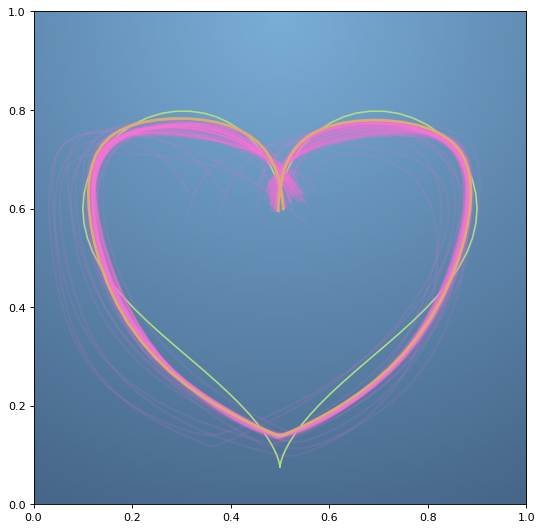

In [19]:
plot_training(x, y, iterations=10000, aggression=7, noise=1)

**После выполнения скопируйте лучшую свою полученную картинку в буфер обмена и вставьте в поле ответа на задание вместе со ссылкой на выполненную работу.**